## 模型保存于加载

In [1]:
from transformers import AutoConfig, AutoModel, AutoTokenizer

### 在线加载

In [2]:
model = AutoModel.from_pretrained("hfl/rbt3")

config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

C:\Users\yj.wang\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yj.wang\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/156M [00:00<?, ?B/s]

### 通过git的方式下载
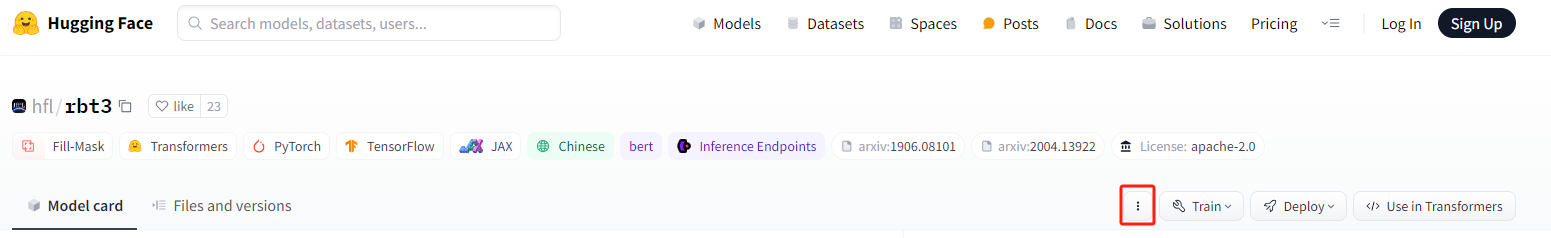
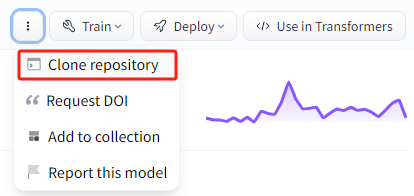
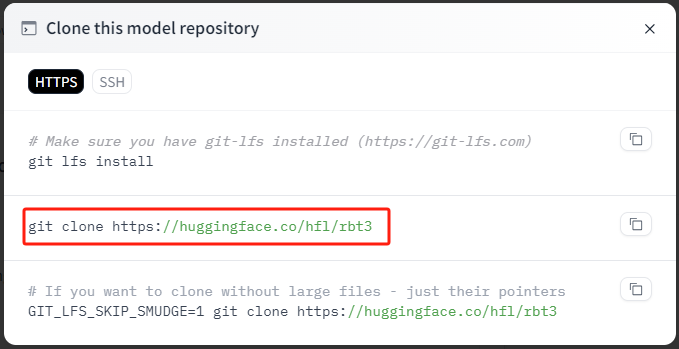

In [ ]:
# 该方法会将所有的各种框架的模型都下载下来
!git clone https://huggingface.co/hfl/rbt3

# 可以使用--include来指定只下载一种框架的模型
!git lfs clone https://huggingface.co/hfl/rbt3 --include="*.bin"

### 直接去网页上下载，并且保存在本地
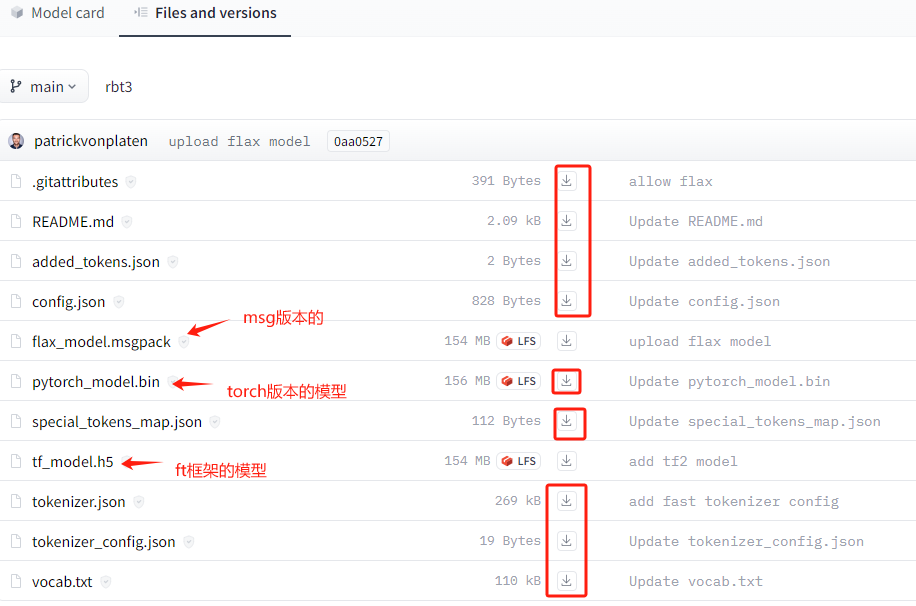

In [4]:
model = AutoModel.from_pretrained("hfl/rbt3")

In [5]:
model.config

BertConfig {
  "_name_or_path": "hfl/rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [7]:
config = AutoConfig.from_pretrained("hfl/rbt3")
config

BertConfig {
  "_name_or_path": "hfl/rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [ ]:
config.output_attentions

## 模型的调用

In [10]:
sen = "弱小的我也有大梦想！"
tokenizer = AutoTokenizer.from_pretrained("hfl/rbt3")
# 分词器：分词+转换成id字典序列+padding/trunction + attention_mask + token_type_ids
inputs = tokenizer(sen, return_tensors="pt")  # 返回pt类型的数据，因为我们要输入的是pt类型的模型进行训练或者推理的
inputs

{'input_ids': tensor([[ 101, 2483, 2207, 4638, 2769,  738, 3300, 1920, 3457, 2682, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

### 不带Model Head模型的调用
其实就是AutoModel.from_pretrained() 这样子的调用方式就是不带head的模型

In [14]:
model = AutoModel.from_pretrained("hfl/rbt3", output_attentions=True)

In [21]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(21128, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
    

In [15]:
output = model(**inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.6804,  0.6664,  0.7170,  ..., -0.4102,  0.7839, -0.0262],
         [-0.7378, -0.2748,  0.5034,  ..., -0.1359, -0.4331, -0.5874],
         [-0.0212,  0.5642,  0.1032,  ..., -0.3617,  0.4646, -0.4747],
         ...,
         [ 0.0853,  0.6679, -0.1757,  ..., -0.0942,  0.4664,  0.2925],
         [ 0.3336,  0.3224, -0.3355,  ..., -0.3262,  0.2532, -0.2507],
         [ 0.6761,  0.6688,  0.7154,  ..., -0.4083,  0.7824, -0.0224]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-1.2646e-01, -9.8619e-01, -1.0000e+00, -9.8325e-01,  8.0238e-01,
         -6.6268e-02,  6.6919e-02,  1.4784e-01,  9.9451e-01,  9.9995e-01,
         -8.3050e-02, -1.0000e+00, -9.8865e-02,  9.9980e-01, -1.0000e+00,
          9.9993e-01,  9.8291e-01,  9.5363e-01, -9.9948e-01, -1.3219e-01,
         -9.9733e-01, -7.7934e-01,  1.0720e-01,  9.8040e-01,  9.9953e-01,
         -9.9939e-01, -9.9997e-01,  1.4967e-01, -8.7627e-01, -9.999

In [16]:
output.last_hidden_state

tensor([[[ 0.6804,  0.6664,  0.7170,  ..., -0.4102,  0.7839, -0.0262],
         [-0.7378, -0.2748,  0.5034,  ..., -0.1359, -0.4331, -0.5874],
         [-0.0212,  0.5642,  0.1032,  ..., -0.3617,  0.4646, -0.4747],
         ...,
         [ 0.0853,  0.6679, -0.1757,  ..., -0.0942,  0.4664,  0.2925],
         [ 0.3336,  0.3224, -0.3355,  ..., -0.3262,  0.2532, -0.2507],
         [ 0.6761,  0.6688,  0.7154,  ..., -0.4083,  0.7824, -0.0224]]],
       grad_fn=<NativeLayerNormBackward0>)

In [17]:
output.last_hidden_state.size()  # 12个 token，每个token 768维

torch.Size([1, 12, 768])

In [20]:
len(inputs['input_ids'][0])

12

### 带Model Head的模型调用

In [22]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification 

In [25]:
# from_pretrained里面传递的参数，有一个config，这个就是用来配置模型的参数，然后这个参数可以通过查看具体的调用模型的源代码来查看
clz_model = AutoModelForSequenceClassification.from_pretrained("hfl/rbt3", num_labels=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/rbt3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
clz_model(**inputs)

SequenceClassifierOutput(loss=None, logits=tensor([[0.5736, 0.0966]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [3]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("Langboat/bloom-389m-zh")

config.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

C:\Users\yj.wang\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yj.wang\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

In [4]:
model = AutoModelForCausalLM.save_pretrained("./models/Langboat/bloom-389m-zh")

AttributeError: type object 'AutoModelForCausalLM' has no attribute 'save_pretrained'